In [0]:
!nvidia-smi

Wed Apr 22 14:39:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
import os
os.chdir('/content/drive/My Drive/GP/src')
print(os.getcwd())
#print(os.listdir())

/content/drive/My Drive/GP/src


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 14 23:12:44 2020

@author: zll
"""
from DRIVE_data_set import DRIVE_data_set
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from MF_UNet import MF_U_Net
from time import time

#################################
# traing epoches
EPOCHES = 100
# epoches pre-trained
st_ep = 181
# if there is a pre_trained net
PRE_TRAIN = True
# pretrained net path
pretrained_net = 'mf_unet_180.pkl'
# batch size
batch_size = 48
#################################

train_set = DRIVE_data_set(train=True, online=True)
loader = DataLoader(train_set, batch_size=batch_size)  # data loader
print('data loaded.')


# use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)

# creat and init unet
model = MF_U_Net()
if PRE_TRAIN:
    model.load_state_dict(torch.load(pretrained_net))

model.to(device)  # copy modle to GPU

# loss function
criterion = nn.CrossEntropyLoss().cuda()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# training
for epoch in range(st_ep, st_ep + EPOCHES):
    start_time = time()
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get input
        inputs, lables = data
        lables = torch.tensor(lables, dtype=torch.long)
        lables = lables.squeeze(1)
        # copy data to GPU
        inputs, lables = inputs.to(device), lables.to(device)
        # set gradiant 0
        optimizer.zero_grad()

        # forwarding
        outputs = model(inputs)
        # compute loss
        loss = criterion(outputs, lables)
        # backwarding
        loss.backward()
        # optimizing
        optimizer.step()

        # print states info
        running_loss += loss.item() * batch_size
    # print epoch loss and time
    print('[%d, loss: %.6f]' % (epoch, running_loss / train_set.len))
    print((time() - start_time) // 60, 'minutes per epoche.')
    # save model every epoch
    torch.save(model.state_dict(), 'mf_unet_'+str(epoch)+'.pkl')


KeyboardInterrupt: ignored

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 14 23:12:44 2020

@author: zll
"""
from DRIVE_data_set import DRIVE_data_set
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from MF_UNet2 import MF_U_Net
from time import time

#################################
# traing epoches
EPOCHES = 100
# epoches pre-trained
st_ep = 184
# if there is a pre_trained net
PRE_TRAIN = True
# pretrained net path
pretrained_net = 'mf_unet2_183.pkl'
# batch size
batch_size = 48
#################################

train_set = DRIVE_data_set(train=True, online=True)
loader = DataLoader(train_set, batch_size=batch_size)  # data loader
print('data loaded.')


# use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)

# creat and init unet
model = MF_U_Net()
if PRE_TRAIN:
    model.load_state_dict(torch.load(pretrained_net))

model.to(device)  # copy modle to GPU

# loss function
criterion = nn.CrossEntropyLoss().cuda()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# training
for epoch in range(st_ep, st_ep + EPOCHES):
    start_time = time()
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get input
        inputs, lables = data
        lables = torch.tensor(lables, dtype=torch.long)
        lables = lables.squeeze(1)
        # copy data to GPU
        inputs, lables = inputs.to(device), lables.to(device)
        # set gradiant 0
        optimizer.zero_grad()

        # forwarding
        outputs = model(inputs)
        # compute loss
        loss = criterion(outputs, lables)
        # backwarding
        loss.backward()
        # optimizing
        optimizer.step()

        # print states info
        running_loss += loss.item() * batch_size
    # print epoch loss and time
    print('[%d, loss: %.6f]' % (epoch, running_loss / train_set.len))
    print((time() - start_time) // 60, 'minutes per epoche.')
    # save model every epoch
    torch.save(model.state_dict(), 'mf_unet2_'+str(epoch)+'.pkl')


data loaded.
device: cuda:0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[184, loss: 0.106004]
61.0 minutes per epoche.
[185, loss: 0.105479]
61.0 minutes per epoche.
[186, loss: 0.105006]
61.0 minutes per epoche.
[187, loss: 0.104565]
61.0 minutes per epoche.
[188, loss: 0.104147]
61.0 minutes per epoche.
[189, loss: 0.103750]
61.0 minutes per epoche.
[190, loss: 0.103364]
61.0 minutes per epoche.


{'TP': 25010, 'TN': 293321, 'FP': 7199, 'FN': 4430, 'acc': 0.9647563341011003, 'sn': 0.7764910428761906, 'sp': 0.9851217964003447, 'rc': 0.8495244565217103, 'f1': 0.8113675804836421, 'jac': 0.6826059663200229}
0.9834958670708995


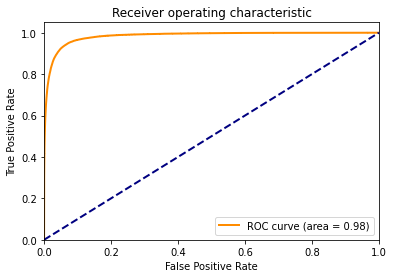

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 15:19:35 2020

@author: zll
"""

import cv2 as cv
import numpy as np
import imageio
import torch
from preprocessing import my_proc
from MF_UNet2 import MF_U_Net
from U_Net2 import U_Net
from math import floor, ceil
from metrics import metrics, roc


def get_patchs(img):
    '''
    extract patch from image for segmetation
    '''
    cols, rows = img.shape
    patchs = list()
    x, y = 0, 0  # position of left-up corner
    for i in range(cols // 52):
        for j in range(rows // 52):
            patch = img[x: x + 52, y: y + 52]
            patch = np.pad(patch, 6, "mean")
            patchs.append(patch)
            y += 52
        y = 0
        patch = img[x: x + 52, -52:]
        patch = np.pad(patch, 6, "mean")
        patchs.append(patch)
        x += 52
    x += 0
    for j in range(rows // 52):
        patch = img[-52:, y: y + 52]
        patch = np.pad(patch, 6, "mean")
        patchs.append(patch)
    patch = img[-52:, -52:]
    patch = np.pad(patch, 6, "mean")
    patchs.append(patch)

    patchs = np.array(patchs)
    return patchs


def from_patch(patchs, img_shape):
    '''
    input:patchs:numpy array
    '''
    index = 0  # patch index
    cols, rows = img_shape
    img = np.empty(img_shape, dtype='uint8')
    x, y = 0, 0  # position of left-up corner
    for i in range(cols // 52):
        for j in range(rows // 52):
            img[x+6:x+58, y+6:y+58] = patchs[index, 6:-6, 6:-6]
            index += 1
            y += 52
        y = 0
        img[x+6:x+58, -58:] = patchs[index, 6:-6, 6:]
        index += 1
        x += 52
    for j in range(rows // 52):
        img[-58:, y+6:y+58] = patchs[index, 6:, 6:-6]
        index += 1
    img[-58:, -58:] = patchs[index, 6:, 6:]
    index += 1

    return img


def seg_img_patch(net, img_file, mask_file=None):
    # read images
    img = cv.imread(img_file)
    if img is None:    # cv2 cannot read gif
        img = imageio.mimread(img_file)  # but imageio can
    if mask_file is not None:
        msk = cv.imread(mask_file, cv.IMREAD_GRAYSCALE)
        if msk is None:
            msk = imageio.mimread(mask_file)[0]

    # preprocess
    proc = my_proc(np.uint8([img]))[0]  # numpy array of uint8

    inputs = get_patchs(proc)

    inputs = inputs.reshape(inputs.shape[0], 1,
                            inputs.shape[1], inputs.shape[2])

    # normalization
    inputs = np.float32(inputs)
    inputs /= 255

    inputs = torch.tensor(inputs)

    out = net(inputs)[:, 1, :, :]

    out = np.uint8(out >= 0.5)

    out = from_patch(out, proc.shape)

    pred = out

    pred = np.uint8(pred >= 0.5)
    pred *= 255

    # mask
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            pred[i, j] = pred[i, j] if msk[i, j] == 255 else 0

    return pred


def seg_img_patch4(net, img_file, mask_file=None):
    # read images
    img = cv.imread(img_file)
    if img is None:    # cv2 cannot read gif
        img = imageio.mimread(img_file)  # but imageio can
    if mask_file is not None:
        msk = cv.imread(mask_file, cv.IMREAD_GRAYSCALE)
        if msk is None:
            msk = imageio.mimread(mask_file)[0]

    # preprocess
    proc = my_proc(np.uint8([img]))[0]  # numpy array of uint8
    pred = np.zeros(proc.shape, dtype='uint8')  # predict

    for rot in range(4):  # rotate 4 times
        rot_pic = np.rot90(proc, rot)

        inputs = get_patchs(rot_pic)

        inputs = inputs.reshape(inputs.shape[0], 1,
                                inputs.shape[1], inputs.shape[2])

        # normalization
        inputs = np.float32(inputs)
        inputs /= 255

        inputs = torch.tensor(inputs)

        out = net(inputs)[:, 1, :, :]

        out = np.uint8(out >= 0.5)

        out = from_patch(out, rot_pic.shape)

        # rotate back
        out = np.rot90(out, 4 - rot)
        pred += out

    pred = np.uint8(pred >= 2)
    pred *= 255

    # mask
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            pred[i, j] = pred[i, j] if msk[i, j] == 255 else 0

    return pred


def seg_img(net, img_file, mask_file=None):
    '''
    arguments:
        net: initialized model
        img_file: str, image(before preprocess) file name
        mask_file: str, mask(if there is) file name
    returns:
        (pred: segment prediction, 2-D numpy byte array, 0 and 255, \
         out: net output before thresholding, 2-D numpy float32 array)
    '''
    # read images
    img = cv.imread(img_file)
    if img is None:    # cv2 cannot read gif
        img = imageio.mimread(img_file)  # but imageio can
    if mask_file is not None:
        msk = cv.imread(mask_file, cv.IMREAD_GRAYSCALE)
        if msk is None:
            msk = imageio.mimread(mask_file)[0]

    # preprocess
    proc = my_proc(np.uint8([img]))[0]  # numpy array of uint8
    shape = ((proc.shape[0] // 8 + 1) * 8,
             (proc.shape[1] // 8 + 1) * 8)  # shape of inputs
    inputs = np.empty(shape, dtype='float32')  # inputs of net
    # may need padding
    pad = (floor((shape[0] - proc.shape[0]) / 2),
           ceil((shape[0] - proc.shape[0]) / 2),
           floor((shape[1] - proc.shape[1]) / 2),
           ceil((shape[1] - proc.shape[1]) / 2))
    inputs[pad[0]: -pad[1], pad[2]: -pad[3]] = proc
    # convert to 4-D
    inputs = inputs.reshape((1, 1, shape[0], shape[1]))
    # normalization
    inputs /= 255
    inputs = torch.tensor(inputs)

    out = net(inputs)
    out = out[0, 1, :, :]
    # remove padding
    out = out[pad[0]: -pad[1], pad[2]: -pad[3]]
    # prediction, thresholding by 0.5
    pred = np.uint8(out >= 0.5)
    pred *= 255
    out = out.detach().numpy()

    # mask
    if mask_file is not None:
        for i in range(pred.shape[0]):
            for j in range(pred.shape[1]):
                pred[i, j] = pred[i, j] if msk[i, j] == 255 else 0

    return pred, out  # out may be used in roc


if __name__ == '__main__':
    model = MF_U_Net()
    model.eval()
    model.load_state_dict(torch.load('mf_unet2_190.pkl',
                    map_location=torch.device('cpu')))
    
    pred, out = seg_img(model,
                '../data/DRIVE/test/proc_imgs/01_test.tif',
                '../data/DRIVE/test/mask/01_test_mask.gif')
    '''
    pred, out = seg_img(model,
             '../data/Image_01L.jpg')
    '''
    '''cv.imshow('img', pred)
    cv.waitKey(0)
    cv.destroyAllWindows()'''
    lable_file = '../data/DRIVE/test/1st_manual/01_manual1.gif'
    #lable_file = '../data/Image_01L_1stHO.png'
    target = cv.imread(lable_file, cv.IMREAD_GRAYSCALE)
    if target is None:    # cv2 cannot read gif
        target = imageio.mimread(lable_file)[0]  # but imageio can
    met = metrics(pred, target)
    auroc = roc(target, out)
    print(met)
    print(auroc)
    cv.imwrite('image_D_190.jpg', pred)
